In [254]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [255]:
# Function to display an image in Jupyter Notebook
def show_image(title, image, cmap_type='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

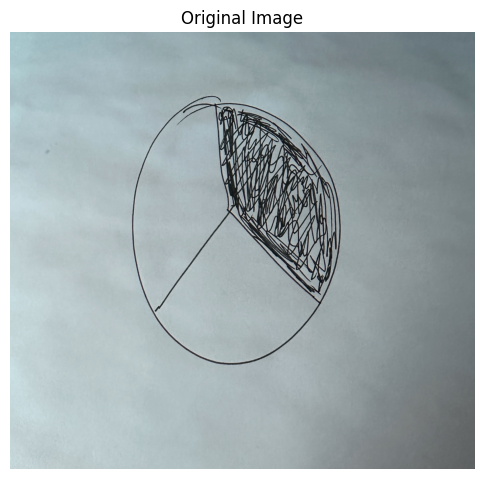

In [284]:
# read the image
file = "/Users/siddmittal/Documents/School/syde-capstone/research/img5.JPG"
image = cv2.imread(file)
show_image("Original Image", image, cmap_type=None)

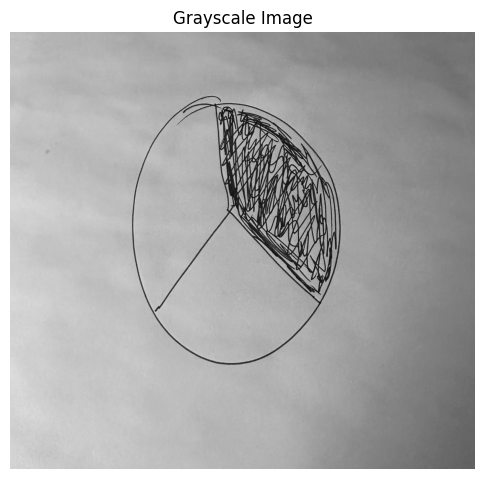

In [285]:
# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
show_image('Grayscale Image', gray_image)

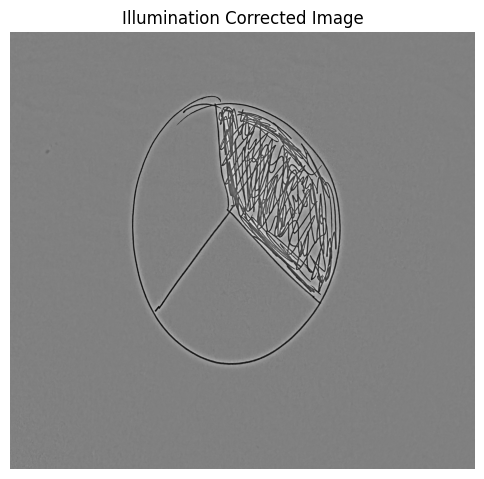

In [286]:
# Step 3: Illumination Compensation
# Blur the image heavily to approximate the lighting condition and subtract it from the original
blurred_for_illumination = cv2.GaussianBlur(gray_image, (101, 101), 0)
illumination_corrected = cv2.addWeighted(gray_image, 1, blurred_for_illumination, -1, 128)
show_image('Illumination Corrected Image', illumination_corrected)


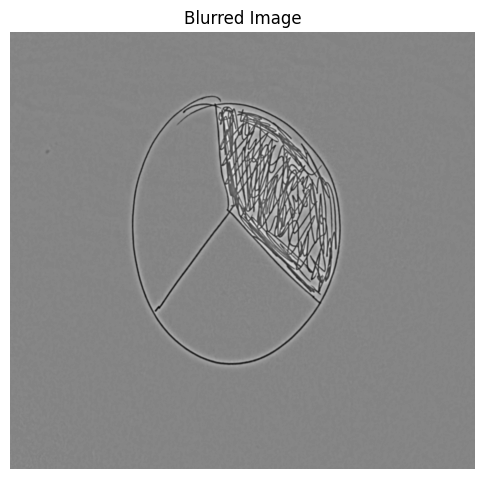

In [287]:
# Step 4: Apply Gaussian Blur to reduce noise in the background
blurred_image = cv2.GaussianBlur(illumination_corrected, (15, 15), 0)
show_image('Blurred Image', blurred_image)

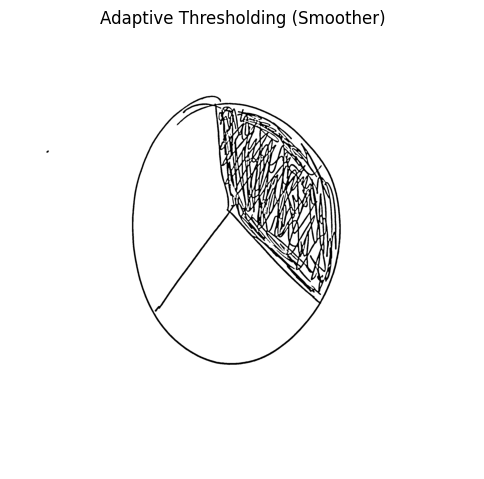

In [288]:
# Step 5: Adaptive Thresholding with a lower block size for smoother output
threshold_image = cv2.adaptiveThreshold(
    blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 10
)
show_image('Adaptive Thresholding (Smoother)', threshold_image)

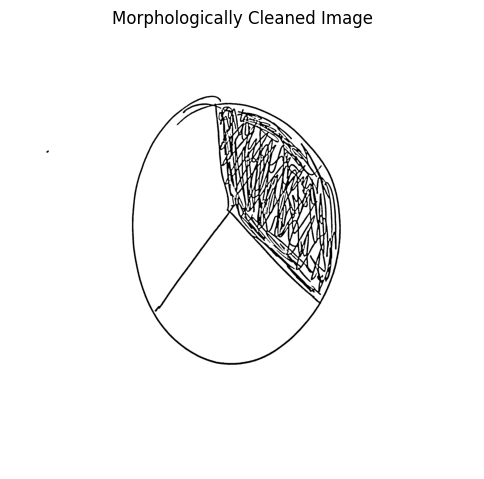

In [289]:
# Step 6: Morphological Operations to clean noise (Opening)
kernel = np.ones((3, 3), np.uint8)
cleaned_image = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel)
show_image('Morphologically Cleaned Image', cleaned_image)

In [290]:
# Step 7: Block Averaging to downscale to 30x30
def block_averaging(image, target_size):
    height, width = image.shape
    new_height, new_width = target_size
    block_height = height // new_height
    block_width = width // new_width

    # Create the downscaled image
    downscaled_image = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            # Define the region to average
            start_row, end_row = i * block_height, (i + 1) * block_height
            start_col, end_col = j * block_width, (j + 1) * block_width
            block = image[start_row:end_row, start_col:end_col]
            # Set the value of the new pixel to the average value of the block
            downscaled_image[i, j] = np.mean(block).astype(np.uint8)

    return downscaled_image

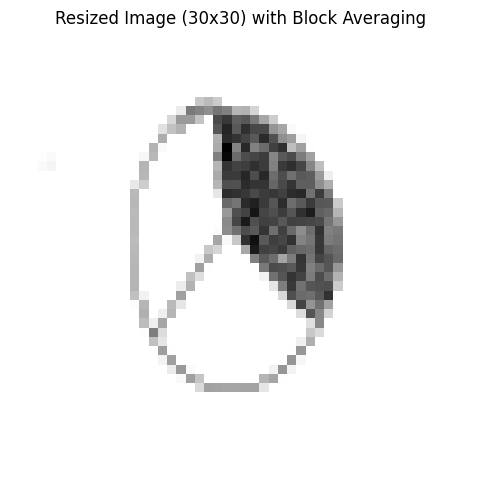

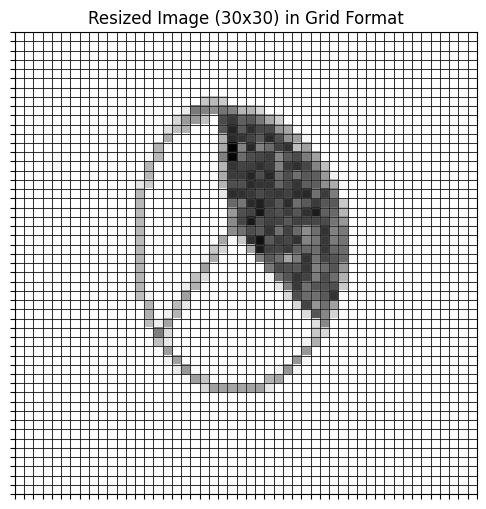

In [291]:

# Downscale the morphologically cleaned image to 30x30 using block averaging
resized_image = block_averaging(cleaned_image, (50, 50))
show_image('Resized Image (30x30) with Block Averaging', resized_image)

# Step 8: Visualize Resized Image in a Grid
def show_grid(image, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    
    # Draw grid lines
    num_rows, num_cols = image.shape
    for i in range(num_rows + 1):
        ax.axhline(i - 0.5, color='black', linewidth=0.5)
    for j in range(num_cols + 1):
        ax.axvline(j - 0.5, color='black', linewidth=0.5)
    
    ax.set_xticks(np.arange(-0.5, num_cols, 1))
    ax.set_yticks(np.arange(-0.5, num_rows, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)
    plt.grid(True)
    plt.show()

# Show the resized image as a 30x30 grid
show_grid(resized_image, 'Resized Image (30x30) in Grid Format')

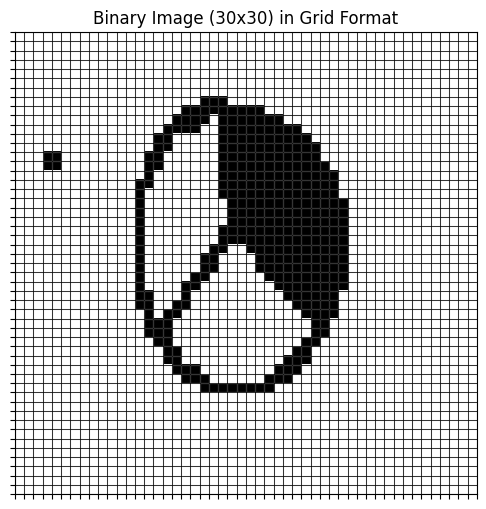

In [292]:
binary_image = np.where(resized_image == 255, 255, 0).astype(np.uint8)
show_grid(binary_image, 'Binary Image (30x30) in Grid Format')
